In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm

E = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]
errEn = 1/100
sigma=7

N=np.array([5.5, 5.5, 5, 5, 4, 4, 3, 5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 4])*100

for l in range(len(E)):
    #print(E[l])
    
    raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\curva_calibrazione\900mm2\curva_cal_900mm2_13-11-24_" +str(E[l]) +"MeV.dat")

    data1 = []

    for i in range(len(raw_data)):
        for j in range(int(raw_data[i])):
            data1.append(i)

    data = np.array(data1)

    signal = []


    for i in range(len(data)):
        if data[i] > np.array(raw_data).argmax()-75 and data[i] <np.array(raw_data).argmax()+75 : signal.append(data[i])


    #plt.hist(signal)
    #plt.show()
    
    N_ext=sum(raw_data)
    #print(N_ext)
    def model(x, N1, mu1, sigma1):
    	return N1*norm.cdf(x, loc = mu1, scale = sigma1)


    #bin_content, bin_edges,_ = plt.hist(signal, bins = 10)
    numbins=[]
    chi2=[]
    
    #c = int(np.ceil(1 + np.log(len(signal)/np.log(2))))
    
    for nbins in range(10, 200):
       
        bin_content, bin_edges = np.histogram(signal, bins = nbins)
        N_events = sum(bin_content)
    
        costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
        my_minuit = Minuit(costf, N1 = N_events,  mu1 = np.array(raw_data).argmax(), sigma1 = sigma)
        my_minuit.migrad()
        
        
        #print(my_minuit.valid, my_minuit.fmin.reduced_chi2)
        if ((my_minuit.valid == True) and (my_minuit.fval/my_minuit.ndof > 0.9 )):
            chi2.append(my_minuit.fval/my_minuit.ndof)
            numbins.append(nbins)
            #display(my_minuit)

    
    index = np.array(chi2).argmin() #dove c'è il fit migliore


    
    nbins = numbins[index]
    
    bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
    N_events = sum(bin_content)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit = Minuit(costf, N1 = N_events, mu1 = np.array(raw_data).argmax(), sigma1 = sigma)
    
    my_minuit.migrad()
    #display(my_minuit)
    print(f"\n En = {E[l]}, bins = {nbins}, chi_2= {my_minuit.fmin.reduced_chi2:.1f}")

    
    ch1 = my_minuit.values['mu1']
    err_ch1 = my_minuit.errors['mu1']
    fwhm = my_minuit.values['sigma1']
    errfwhm = my_minuit.errors['sigma1']
    #salva i dati che ci interessano in myfile.txt
    with open("calibrazione_900mm2", "a") as f:
        f.write(f"{E[l]} {errEn} {ch1} {err_ch1} {fwhm} {errfwhm} {my_minuit.fmin.reduced_chi2:.1f}")
        f.write("\n")
        f.close()
        
   


 En = 1, bins = 38, chi_2= 1.2

 En = 1.5, bins = 76, chi_2= 1.1

 En = 2, bins = 10, chi_2= 1.2

 En = 2.5, bins = 76, chi_2= 1.1

 En = 3, bins = 77, chi_2= 1.4

 En = 3.5, bins = 20, chi_2= 1.0

 En = 4, bins = 36, chi_2= 0.9

 En = 4.5, bins = 82, chi_2= 1.1

 En = 5, bins = 82, chi_2= 1.2

 En = 5.5, bins = 76, chi_2= 1.0

 En = 6, bins = 73, chi_2= 1.5

 En = 6.5, bins = 83, chi_2= 1.1

 En = 7, bins = 86, chi_2= 1.4

 En = 7.5, bins = 73, chi_2= 1.7

 En = 8, bins = 75, chi_2= 1.3

 En = 8.5, bins = 80, chi_2= 1.4

 En = 9, bins = 80, chi_2= 1.0


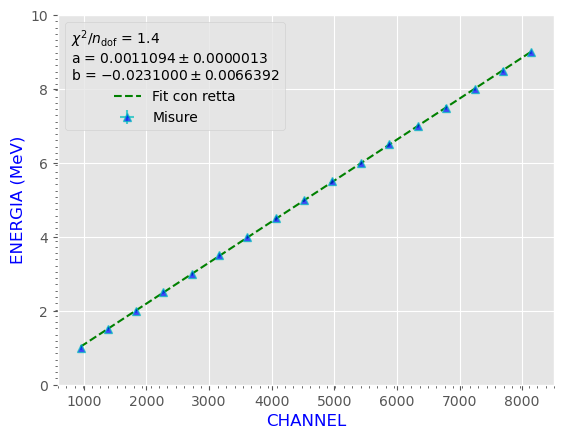

 
a = 0.0011093521959666735 +- 1.3179934229295672e-06 
b = -0.023100034836761818 +- 0.006639234479868713


In [11]:
import matplotlib.ticker as ticker

data = np.loadtxt("calibrazione_900mm2")
En = data[:,0] #in Mev
errEn = data[:,1]
ch = data[:,2]
errch = data[:,3]
fwhm = data[:,4] # da ritorccare per ricavare fwhm vera non sigma
errfwhm = data[:,5]


err = [] 

for i in range(len(En)):
    err.append(1.2*En[i]*np.sqrt((errEn[i]/En[i])**2+(errch[i]/ch[i])**2))


func = lambda x, a, b: a*x + b


least_squares = LeastSquares (ch, En, err, func)
m = Minuit (least_squares, a=0, b=0) 

m.migrad ()  
m.hesse ()
#display(m)

x2 = np.linspace(ch[0], ch[-1], 100)

fig, ax = plt.subplots()

plt.errorbar(ch, En, xerr=list(map(lambda x: x/2.3, errEn)), yerr=list(map(lambda x: x/2.3, errch)), linestyle="None", marker = "^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.plot(x2, func(x2, m.values[0], m.values[1] ), linestyle="--", color="g", label="Fit con retta")
plt.grid("on")
plt.xlabel("CHANNEL", color="b")
plt.ylabel("ENERGIA (MeV)", color="b")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.7f} \\pm {e:.7f}$")

plt.legend(title="\n".join(fit_info), frameon=True)

plt.style.use("ggplot")

#plt.xlim(10, 80)
plt.ylim(0, 10)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()


print(f" \na = {m.values[0]} +- {m.errors[0]} \nb = {m.values[1]} +- {m.errors[1]}")

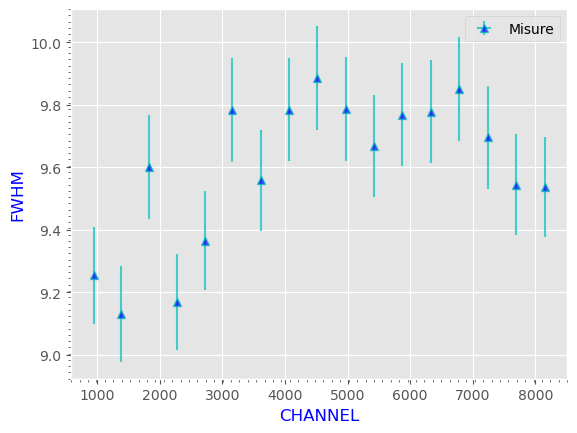

In [13]:
fig, ax = plt.subplots()

plt.errorbar(ch, fwhm, xerr=list(map(lambda x: x*1.2, errfwhm)), yerr=list(map(lambda x: x*1.2, errch)), linestyle="None", marker = "^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
#plt.plot(x2, func(x2, m.values[0], m.values[1] ), linestyle="--", color="g", label="Fit con retta")
plt.grid("on")
plt.xlabel("CHANNEL", color="b")
plt.ylabel("FWHM", color="b")


plt.legend(loc = "best", frameon=True)

plt.style.use("ggplot")

#plt.xlim(10, 80)
#plt.ylim(0, 10)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()